# Band Stacking, RGB & False Color Images, and Interactive Widgets 
## Using the NEON AOP Hyperspectral Python Module

## Objectives 
In the first lesson, we learned how to read in hdf5 data using h5py, plot a single band of a flightline of reflectance data, subset a flightline reflectance file, and plot a single band of the subsetted reflectance. We can do these tasks more efficiently using functions. In this lesson, we will load the NEON AOP Python module, which contains a series of functions to work with NEON hyperspectral data. We will also plot different combinations of bands, and learn how to create widgets to look at data more interactively. 


## Background

We can combine any three bands from the NEON reflectance data to make an RGB image that will depict different information about the Earth's surface. A **natural-color** image, made with bands from the red, green, and blue wavelengths looks close to what we would see with the naked eye. We can also choose band combinations from other wavelenghts, and map them to the red, blue, and green colors to highlight different features. A **false-color** image is made with one or more bands from a non-visible portion of the electromagnetic spectrum that are mapped to red, green, and blue colors. These images can display other information about the landscape that is not easily seen with a natural-color image. 

The NASA Goddard Media Studio video "Peeling Back Landsat's Layers of Data" gives a good quick overview of natural and false color band combinations. Note that Landsat collects information from 11 wavelength bands, while NEON AOP hyperspectral data collects information from 426 bands!

<a href="https://www.youtube.com/watch?v=YP0et8l_bvY" target="_blank"><img src="files/NASA_Goddard_RGB_Images.png" 
alt="IMAGE ALT TEXT HERE" width="400" height="300" border="10" /></a>

https://www.youtube.com/watch?v=YP0et8l_bvY
https://svs.gsfc.nasa.gov//vis/a010000/a011400/a011491/index.html

**Further Reading**: Check out the NASA Earth Observatory Article on "How to Interpret a False-Color Satellite Image"

https://earthobservatory.nasa.gov/Features/FalseColor/

Before we get started, let's set up our plot and warning preferences:

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

We will start by importing a module with a suite of functions that we will use in the remainder of the course. You can add to these functions or customize them to better suit your data needs. First we can see some ways to import the module into Jupyter and explore what is inside them:

- `%load module_name` - loads a module into a Jupyter Notebook cell. Allows flexibility for modifying functions.
- `%%writefile module_name.py` - writes out contents of Jupyter Notebook cell to module_name.py (overwrites if that file already exists).
- `import module_name as shortname` - imports a module, does not enable modifications. 
- `help(module_name)` - lists functions in a module along associated with docstrings 
- `dir(module_name)` - lists all functions and packages in a module
- `function_name?` - displays docstring associated with function_name

We will load in a module called neon_aop_refl_hdf5_functions. Download and copy this module into your current working directory, or include the path when you load it. 

You can load this module into the next cell by typing:

`%load neon_aop_refl_hdf5_functions`

Alternately, if you want to import the module behind the scenes, you can type:

`import neon_aop_refl_hdf5_functions as neon`

If you choose to import the module, When you call functions from this module, you will have to first type `neon.`, eg. `neon.plot_band_array`. 

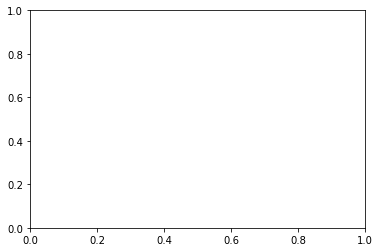

In [2]:
%load neon_aop_refl_hdf5_functions

We can use the h5refl2array function to read in the SERC reflectance flightline from Lesson 1. For a quick look at how to run this function, type one of the following in the next code cell:

`h5refl2array?` 

`help(h5refl2array)`

In [3]:
sercRefl, sercRefl_md, wavelengths = h5refl2array('../data/SERC/hyperspectral/NEON_D02_SERC_DP1_20160807_160559_reflectance.h5')

We can write a `for` loop to list the metadata values that this function reads in:

In [4]:
for item in sorted(sercRefl_md):
    print(item + ':',sercRefl_md[item])

bad_band_window1: [1340 1445]
bad_band_window2: [1790 1955]
epsg: 32618
ext_dict: {'xMin': 367167.0, 'yMin': 4300128.0, 'yMax': 4310980.0, 'xMax': 368273.0}
extent: (367167.0, 368273.0, 4300128.0, 4310980.0)
mapInfo: b'UTM, 1.000, 1.000, 367167.000, 4310980.000, 1.0000000000e+000, 1.0000000000e+000, 18, North, WGS-84, units=Meters'
noDataVal: -9999.0
projection: b'+proj=UTM +zone= 18 +ellps= WGS-84 +datum= WGS-84 +units= units=Meters +no_defs'
res: {'pixelWidth': 1.0, 'pixelHeight': 1.0}
scaleFactor: 10000.0
shape: (10852, 1106, 426)


## Subset and Stack Bands
It is often useful to look at several bands together. We can extract and stack three bands in the red, green, and blue (RGB) spectrums to produce a color image that looks similar to what we see with our eyes. In the next part of this tutorial, we will learn to stack multiple bands and make a geotif raster from the compilation of these bands. We can see that different combinations of bands allow for different visualizations of the remotely-sensed objects and also conveys useful information about the chemical makeup of the Earth's surface. 

Let's use some functions from the module to start: 

In [5]:
#Define the RGB bands (use HDFViewer for a quick look at the wavelengths corresponding to the bands)
RGBbands = (58,34,19) #These indexes correspond to R,G,B bands in the visible range of the EM spectrum 

#Print the center wavelengths corresponding to these three bands:
print('Band 58 Center Wavelength = %.2f' %(wavelengths.value[57]),'nm') #Red
print('Band 34 Center Wavelength = %.2f' %(wavelengths.value[33]),'nm') #Green
print('Band 19 Center Wavelength = %.2f' %(wavelengths.value[18]),'nm') #Blue

Band 58 Center Wavelength = 669.10 nm
Band 34 Center Wavelength = 548.91 nm
Band 19 Center Wavelength = 473.80 nm


We selected these bands so that they fall within the visible range of the electromagnetic spectrum (400-700 nm), where:

- Band 58 = 669 nm  --> Red <img src="https://science-edu.larc.nasa.gov/EDDOCS/images/Erb/Red_Spectrum.jpg">
- Band 34 = 549 nm --> Green <img src="https://science-edu.larc.nasa.gov/EDDOCS/images/Erb/Green_Spectrum.jpg">
- Band 19 = 474 nm --> Blue <img src="https://science-edu.larc.nasa.gov/EDDOCS/images/Erb/Blue_Spectrum.jpg">

https://science-edu.larc.nasa.gov/EDDOCS/Wavelengths_for_Colors.html

We can use the `stack_subset_bands` function to subset and stack these three bands. First we need to define the subset extent and determine the corresponding indices using the `calc_clip_index`function:

In [6]:
#Define the clip extent dictionary:
clipExtent = {}
clipExtent['xMin'] = 367400. #the decimal point at the end sets the data to floating point
clipExtent['xMax'] = 368100.
clipExtent['yMin'] = 4305750.
clipExtent['yMax'] = 4306350.

#Calculate the pixel indices corresponding to the extent defined above using calc_clip_index:
serc_subInd = calc_clip_index(clipExtent,sercRefl_md['ext_dict']) 
print('SERC Subset Indices:',serc_subInd)

#Stack these subsetted bands using stack_subset_bands:
sercSubset_RGB = stack_subset_bands(sercRefl,sercRefl_md,RGBbands,serc_subInd)

SERC Subset Indices: {'xMin': 233, 'yMin': 4630, 'yMax': 5230, 'xMax': 933}


Next let's plot these three bands separately: 

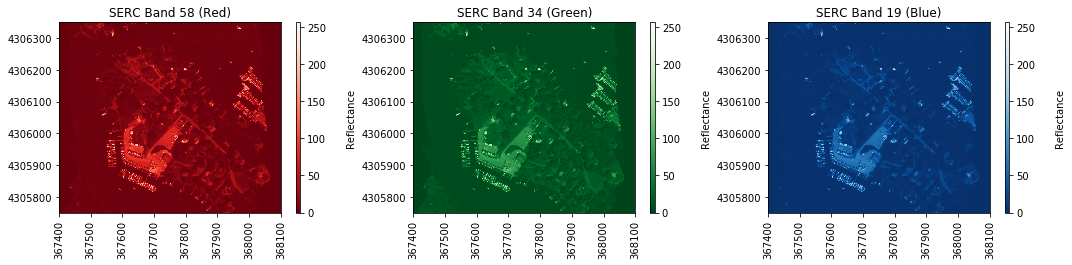

In [7]:
cmap_title='Reflectance'; colorlimit = (0,256);
clipExt = (clipExtent['xMin'],clipExtent['xMax'],clipExtent['yMin'],clipExtent['yMax'])

fig = plt.figure(figsize=(18,3.5))

ax1 = fig.add_subplot(1,3,1)
plot_band_array(sercSubset_RGB[:,:,0],clipExt,colorlimit,ax1,title='SERC Band 58 (Red)', 
                     cmap_title='Reflectance',colormap='Reds_r')

ax2 = fig.add_subplot(1,3,2)
plot_band_array(sercSubset_RGB[:,:,1],clipExt,colorlimit,ax2,title='SERC Band 34 (Green)',
                    cmap_title='Reflectance',colormap='Greens_r')

ax3 = fig.add_subplot(1,3,3)
plot_band_array(sercSubset_RGB[:,:,2],clipExt,colorlimit,ax3,title='SERC Band 19 (Blue)',
                     cmap_title='Reflectance',colormap='Blues_r')

Finally, we can plot the three bands together:

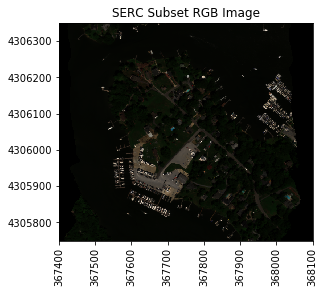

In [8]:
plot_band_array(sercSubset_RGB,clipExt,(0,0.5),title='SERC Subset RGB Image',cbar='off')

## Basic Image Processing -- Contrast Stretch & Histogram Equalization 

We can also try out some basic image processing to better visualize the reflectance data using the ```ski-image``` package. 

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram. Stretching the histogram can improve the contrast of a displayed image, as we will show how to do below. 

<p>
<img src="histogram_equalization.png" style="width: 300px;"/>
</p>

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html

These tutorials were adapted from the following `skikit-image` tutorial:
http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py

Let's start with trying a 2% and 5% linear contrast stretch:

<function __main__.linearStretch>

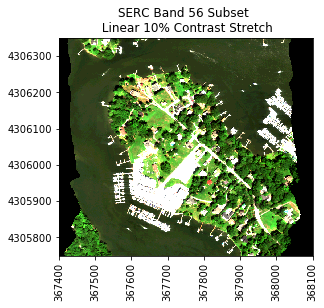

In [9]:
from skimage import exposure
from IPython.html.widgets import *

rgbArray = copy.copy(sercSubset_RGB)

def linearStretch(percent):
    pLow, pHigh = np.percentile(rgbArray[~np.isnan(rgbArray)], (percent,100-percent))
    img_rescale = exposure.rescale_intensity(rgbArray, in_range=(pLow,pHigh))
    plt.imshow(img_rescale,extent=clipExt)
    plt.title('SERC Band 56 Subset \n Linear ' + str(percent) + '% Contrast Stretch'); 
    ax = plt.gca()
    ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree
    
interact(linearStretch,percent=(0,20,1))

<function __main__.adaptEqualizeHist>

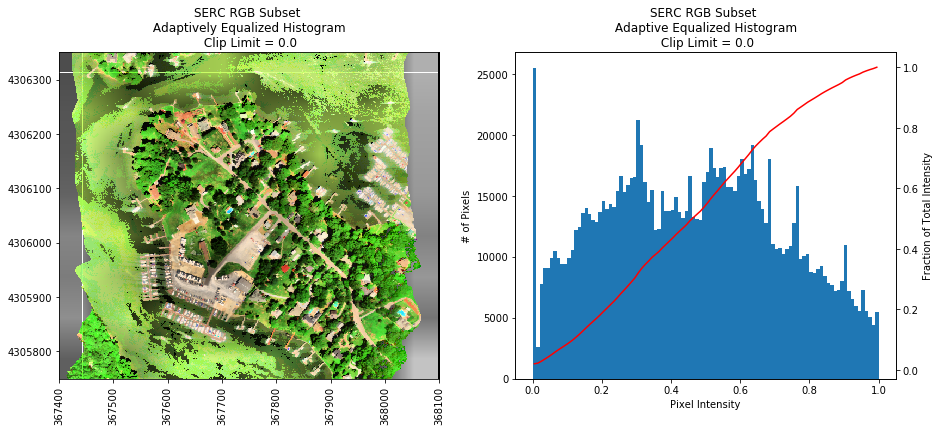

In [10]:
#Adaptive Equalized Histogram

def adaptEqualizeHist(clip):
    img_nonan = np.ma.masked_invalid(rgbArray) #first mask the image to ignore the NaN values
    img_adapteq = exposure.equalize_adapthist(img_nonan, clip_limit=clip)
    
    fig = plt.figure(figsize=(15,6))
    ax1 = fig.add_subplot(1,2,1)
    
    ax1.imshow(img_adapteq,extent=clipExt,cmap='jet') 
    # cbar = plt.colorbar(); cbar.set_label('Reflectance')
    plt.title('SERC RGB Subset \n Adaptively Equalized Histogram \n Clip Limit = ' + str(clip)); 
    ax1.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
    rotatexlabels = plt.setp(ax1.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree
    
    # Display histogram (100 bins)
    bins = 100
    ax_hist = fig.add_subplot(1,2,2)
    ax_hist.hist(img_adapteq.ravel(),bins); #np.ravel flattens an array into one dimension
    plt.title('SERC RGB Subset \n Adaptive Equalized Histogram \n Clip Limit = ' + str(clip)); 
    ax_hist.set_xlabel('Pixel Intensity'); ax_hist.set_ylabel('# of Pixels')

    # Display cumulative distribution
    ax_cdf = ax_hist.twinx()
    img_cdf, bins = exposure.cumulative_distribution(img_adapteq,bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_ylabel('Fraction of Total Intensity')

interact(adaptEqualizeHist,clip=(0,1,.05))

## Color Infrared (CIR) Image
Finally, we'll make a color-infrared (CIR) image, where we will use the same Green and Blue bands as in the RGB array, but we'll replace the Red band with one in the Infrared range of the electromagnetic spectrum (): 

Band 90 Center Wavelength = 829.34 nm
Band 34 Center Wavelength = 548.91 nm
Band 19 Center Wavelength = 473.80 nm


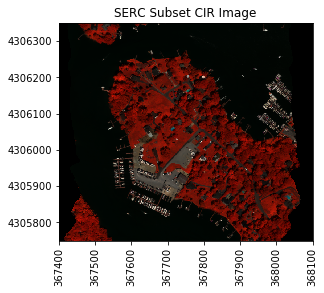

In [11]:
CIRbands = (90,34,19)
print('Band 90 Center Wavelength = %.2f' %(wavelengths.value[89]),'nm')
print('Band 34 Center Wavelength = %.2f' %(wavelengths.value[33]),'nm')
print('Band 19 Center Wavelength = %.2f' %(wavelengths.value[18]),'nm')

sercSubset_CIR = stack_subset_bands(sercRefl,sercRefl_md,CIRbands,serc_subInd)
plot_band_array(sercSubset_CIR,clipExt,(0,0.5),title='SERC Subset CIR Image',cbar='off')

## On Your Own: False Color Image 
We can also create an image from bands outside of the visible spectrum. An image containing one or more bands outside of the visible range is called a **false-color image**. Here we'll use bands with wavelengths in two Short Wave Infrared (SWIR) bands (1100-3000 nm) and one red band (669 nm). 

For more information about non-visible wavelengths, false color images, and some frequently used false-color band combinations, refer to NASA's Earth Observatory page:

https://earthobservatory.nasa.gov/Features/FalseColor/

Example solution below:

Band 90 Center Wavelength = 2196.45 nm
Band 34 Center Wavelength = 1615.56 nm
Band 19 Center Wavelength = 674.11 nm


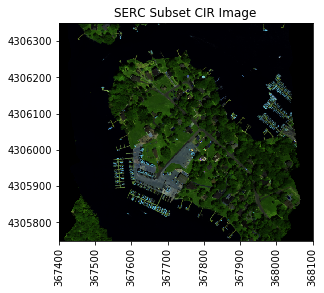

In [12]:
FCIbands = (363,246,58)
print('Band 90 Center Wavelength = %.2f' %(wavelengths.value[362]),'nm')
print('Band 34 Center Wavelength = %.2f' %(wavelengths.value[246]),'nm')
print('Band 19 Center Wavelength = %.2f' %(wavelengths.value[58]),'nm')

sercSubset_FCI = stack_subset_bands(sercRefl,sercRefl_md,FCIbands,serc_subInd)
plot_band_array(sercSubset_FCI,clipExt,(0,0.5),title='SERC Subset CIR Image',cbar='off')

## Try out Different RGB Band Combinations Interactively

Now that we have made a couple different band combinations, we can create a Python widget to explore different combinations of bands in the visible and non-visible portions of the spectrum. 

In [13]:
from IPython.html.widgets import *

#Subset the SERC reflectance array using the indices determined from calc_clip_index
serc_subArray = sercRefl[serc_subInd['yMin']:serc_subInd['yMax'],serc_subInd['xMin']:serc_subInd['xMax'],:]

In [14]:
array = copy.copy(serc_subArray)
Refl_md = copy.copy(sercRefl_md)

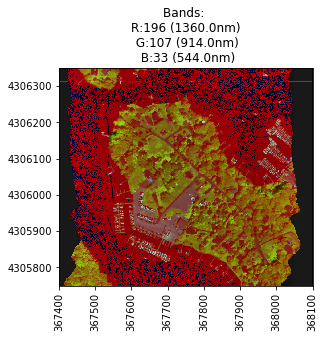

In [15]:
def RGBplot_widget(R,G,B):
    
    #Pre-allocate array  size
    rgbArray = np.zeros((array.shape[0],array.shape[1],3), 'uint8')
    
    Rband = array[:,:,R-1].astype(np.float)
    Rband_clean = clean_band(Rband,Refl_md)
    
    Gband = array[:,:,G-1].astype(np.float)
    Gband_clean = clean_band(Gband,Refl_md)
    
    Bband = array[:,:,B-1].astype(np.float)
    Bband_clean = clean_band(Bband,Refl_md)
    
    rgbArray[..., 0] = Rband_clean*256
    rgbArray[..., 1] = Gband_clean*256
    rgbArray[..., 2] = Bband_clean*256
    
    # Apply Adaptive Histogram Equalization to Improve Contrast:
    
    img_nonan = np.ma.masked_invalid(rgbArray) #first mask the image 
    img_adapteq = exposure.equalize_adapthist(img_nonan, clip_limit=0.10)
    
    plot = plt.imshow(img_adapteq,extent=clipExt); 
    plt.title('Bands: \nR:' + str(R) + ' (' + str(round(wavelengths.value[R-1])) +'nm)'
              + '\n G:' + str(G) + ' (' + str(round(wavelengths.value[G-1])) + 'nm)'
              + '\n B:' + str(B) + ' (' + str(round(wavelengths.value[B-1])) + 'nm)'); 
    ax = plt.gca(); ax.ticklabel_format(useOffset=False, style='plain') 
    rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) 
    
interact(RGBplot_widget, R=(1,426,1), G=(1,426,1), B=(1,426,1))

### References

Kekesi, Alex et al. "NASA | Peeling Back Landsat's Layers of Data". https://svs.gsfc.nasa.gov/vis/a010000/a011400/a011491/. Published on Feb 24, 2014.

Riebeek, Holli. "Why is that Forest Red and that Cloud Blue? How to Interpret a False-Color Satellite Image" https://earthobservatory.nasa.gov/Features/FalseColor/ 
